Temperature Forecast Project using ML

Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

Dataset Link-


https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv




# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


# Importing dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


This is a regression  type machine learning problem because  the goal is to predict a continuous numerical value, such as temperature in degrees Celsius in this case variable in this data set numerical data  data is present

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.sample(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7546,22.0,22-08-2017,32.7,24.4,77.417366,88.337601,29.732836,24.840275,7.725607,50.469828,...,0.159314,0.000000,0.000000,37.5102,127.086,21.9668,0.1332,4746.239746,30.5,24.5
1339,15.0,22-08-2013,32.1,26.0,61.520771,93.096123,30.140061,24.620452,4.756411,62.485917,...,3.950752,0.367859,0.000000,37.5507,126.937,30.0464,0.8552,4772.682617,28.4,22.2
4173,24.0,11-08-2015,31.2,25.6,36.755024,75.417709,32.512677,24.216552,6.652291,52.975171,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5109.454102,33.4,24.2
7500,1.0,21-08-2017,25.9,21.6,62.831303,96.110069,28.262889,22.592898,5.935306,92.263685,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,4950.874023,29.6,20.8
5448,24.0,31-07-2016,33.7,27.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5237,126.909,17.2956,0.2223,5382.089355,33.2,26.4
1880,6.0,13-07-2014,28.8,24.3,45.596466,87.462990,29.699622,23.273949,7.594817,53.756943,...,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5757.363281,30.8,22.9
4218,19.0,13-08-2015,30.2,23.4,41.660896,86.090263,31.112001,23.042664,6.497190,48.564658,...,0.000000,0.000000,0.000000,37.5776,126.938,75.0924,1.7678,5100.811035,32.7,22.0
2081,7.0,21-07-2014,29.7,24.7,78.056862,92.842110,26.658293,24.228727,8.641819,70.933591,...,0.002408,0.000024,0.051363,37.5776,126.838,12.3700,0.0985,5612.043945,27.8,24.5
2529,5.0,08-08-2014,29.6,21.4,41.003304,80.656425,30.193620,20.486052,10.650696,161.010189,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5205.333984,30.7,21.8
244,20.0,09-07-2013,26.0,23.6,71.587364,99.985825,28.541229,23.473605,13.523550,37.762323,...,0.078902,0.002953,0.000000,37.6181,127.004,146.5540,4.7296,5864.960449,25.9,24.2


# Cleaning the data

In [5]:
#checking the null value of  column of dataset
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

we observe that there is null value is present in  columns

In [6]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 1248


<Axes: >

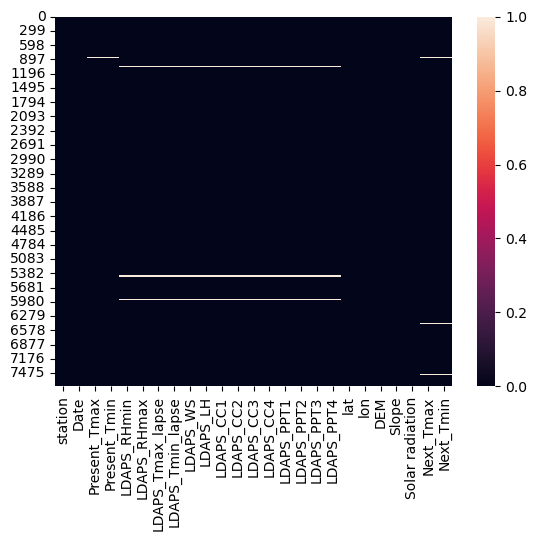

In [7]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe by heat map that there is  null value  present in any columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


 we observe that there is null value present in many column,and all datatypes seem to object and float

# Exploratory Data Analysis(EDA)

In [9]:
#checking the shape of dataset
df.shape

(7752, 25)

we observe that there 7752 row and 25 columns is present in this dataset

In [10]:
#checking the column of dataset
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

there are 25 no of column is present out of which Next_Tmax, Next_Tmin are our target 

In [11]:
# to convert index from row to column
df.columns.tolist()


['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [12]:
#checking the types of column of dataset
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

We observe there are  object type and float datatype are present

In [13]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
station,25
Date,310
Present_Tmax,167
Present_Tmin,155
LDAPS_RHmin,7672
LDAPS_RHmax,7664
LDAPS_Tmax_lapse,7675
LDAPS_Tmin_lapse,7675
LDAPS_WS,7675
LDAPS_LH,7675


mostly all column have unique value in all column there  8 unique value present in target primary_fuel	

In [14]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64


19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
        

These are the value counts of all columns and we have seen there is  no white space are present

In [15]:
#checking the list of counts of target
df["Next_Tmax"].unique()

array([29.1, 30.5, 31.1, 31.7, 31.2, 31.5, 30.9, 31.3, 32.6, 31.4, 30.8,
       33.1, 31.8, 30.6, 32. , 24.8, 27.3, 28.1, 27.9, 28.2, 28.9, 27.6,
       27.1, 27.5, 26.8, 28.7, 27.8, 29.2, 28.8, 30. , 30.1, 29.4, 31.6,
       30.2, 30.4, 32.5, 31. , 25.2, 28.4, 28.3, 27.4, 26.2, 28. , 26.7,
       28.6, 27.7, 28.5, 30.7, 29.6, 29.9, 29.3, 32.2, 33.6, 30.3, 32.3,
       29.8, 29.7, 29.5, 29. , 23.4, 26.4, 26.6, 26.1, 25.4, 27.2, 27. ,
       26.3, 25.5, 25.6, 25.9, 23. , 26.5, 26. , 25.7, 22.4, 25.8, 25.1,
       24.9, 24.3, 24.5, 25.3, 21.8, 24.7, 25. , 24.6, 23.6, 24.1, 23.2,
       23.7, 24.2, 23.8, 23.9, 31.9, 23.1, 33. , 32.7, 26.9, 32.1, 33.3,
       32.4, 33.4, 33.5, 34.8, 34. , 34.3, 34.5,  nan, 32.8, 33.7, 33.2,
       32.9, 34.1, 34.9, 35.3, 34.6, 35. , 33.9, 34.7, 36.6, 34.4, 35.8,
       35.2, 33.8, 35.6, 35.1, 34.2, 36. , 35.5, 35.4, 21.6, 23.5, 24.4,
       24. , 35.9, 36.1, 22.5, 22.8, 36.2, 21.1, 23.3, 22. , 22.7, 20.9,
       22.2, 22.1, 37. , 36.9, 22.9, 35.7, 37.1, 22

In [16]:
#checking the list of counts of target
df["Next_Tmin"].unique()

array([21.2, 22.5, 23.9, 24.3, 24. , 23.4, 22.9, 21.6, 21. , 24.5, 22.2,
       22.8, 20.9, 21.1, 23. , 23.7, 23.2, 24.2, 18.7, 21.5, 21.8, 22.3,
       21.3, 20.7, 19.8, 20.8, 21.7, 22.1, 20.5, 21.9, 17.8, 20.1, 20.3,
       19.4, 19.1, 18.9, 20. , 19.7, 19.5, 20.6, 23.1, 23.3, 22.7, 22.6,
       22.4, 22. , 23.5, 23.8, 21.4, 19.3, 20.4, 19.9, 20.2, 24.1, 23.6,
       24.4, 24.8, 25.1, 24.6, 24.7, 25. , 24.9, 25.3, 26. , 26.1, 25.5,
       25.8, 25.4, 25.6, 25.7, 25.2, 25.9, 26.3, 26.2, 26.4, 26.5, 26.9,
        nan, 26.8, 26.6, 27. , 27.1, 26.7, 27.5, 27.2, 27.4, 27.7, 28.3,
       27.6, 28. , 27.3, 19.6, 19.2, 18.6, 18.5, 18.2, 18.4, 18.8, 17.9,
       17.5, 16.5, 18. , 19. , 16.7, 18.1, 18.3, 28.1, 28.4, 29.4, 29.1,
       28.5, 28.8, 29.8, 29.5, 28.6, 17.1, 16.8, 17.6, 17.4, 15.8, 16.9,
       17.7, 17.2, 15.5, 16.6, 16.4, 16.3, 17. , 14.7, 15.9, 16. , 17.3,
       15.4, 15.3, 13.8, 15.6, 15.1, 27.9, 28.7, 27.8, 28.2, 13.3, 14.1,
       15. , 11.3, 13.4, 15.7, 14.9, 16.2, 14.4, 16

appox all are unique value

In [17]:
df["Next_Tmax"].value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.9      1
38.3      1
37.6      1
37.4      1
21.5      1
Name: Next_Tmax, Length: 183, dtype: int64

In [18]:
df["Next_Tmin"].value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
13.4      1
13.3      1
28.2      1
29.5      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

there are 183 unique value are present 

In [19]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: ['Date']


Numerical columns: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']


There are 24 Numerical column are present and 1 Categorical columns also present

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In [22]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Cleaning of data

In [23]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day,DayOfWeek
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013.0,6.0,30.0,6.0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.0,6.0,30.0,6.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.0,6.0,30.0,6.0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.0,6.0,30.0,6.0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.0,6.0,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.0,8.0,30.0,2.0
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.0,8.0,30.0,2.0
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.0,8.0,30.0,2.0
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN,NaN


In [24]:
#Dropping irrelevant features
df = df.drop(['Date'], axis=1)

In [25]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: []


Numerical columns: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day', 'DayOfWeek']


we observe that all column are coverted in numerical column

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


In [27]:
# Fill NaN values in the 'Numerical' column 
df['station'].fillna(13.0, inplace=True)

In [28]:
df['Present_Tmax'].fillna(df['Present_Tmax'].mean(), inplace=True)

In [29]:
df['Present_Tmin'].fillna(df['Present_Tmin'].mean(), inplace=True)

In [30]:
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean(), inplace=True)

In [31]:
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean(), inplace=True)

In [32]:
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean(), inplace=True)

In [33]:
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean(), inplace=True)

In [34]:
df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean(), inplace=True)

In [35]:
df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean(), inplace=True)

In [36]:
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean(), inplace=True)

In [37]:
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean(), inplace=True)

In [38]:
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean(), inplace=True)

In [39]:
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean(), inplace=True)

In [40]:
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean(), inplace=True)

In [41]:
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean(), inplace=True)

In [42]:
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean(), inplace=True)

In [43]:
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean(), inplace=True)

In [44]:
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean(), inplace=True)

In [45]:
df['lat'].fillna(df['lat'].mean(), inplace=True)

In [46]:
df['lon'].fillna(df['lon'].mean(), inplace=True)

In [47]:
df['DEM'].fillna(df['DEM'].mean(), inplace=True)

In [48]:
df['Slope'].fillna(df['Slope'].mean(), inplace=True)

In [49]:
df['Solar radiation'].fillna(df['Solar radiation'].mean(), inplace=True)

In [50]:
df['Next_Tmax'].fillna(df['Next_Tmax'].mean(), inplace=True)

In [51]:
df['Next_Tmin'].fillna(df['Next_Tmin'].mean(), inplace=True)

In [52]:
df['Year'].fillna(2017, inplace=True)

In [53]:
df['Month'].fillna(6, inplace=True)

In [54]:
df['Day'].fillna(4, inplace=True)

In [55]:
df['DayOfWeek'].fillna(4, inplace=True)

In [56]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day,DayOfWeek
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013.0,6.0,30.0,6.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.0,6.0,30.0,6.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.0,6.0,30.0,6.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.0,6.0,30.0,6.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.0,6.0,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.0,8.0,30.0,2.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.0,8.0,30.0,2.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.0,8.0,30.0,2.0
7750,13.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,126.826,12.3700,0.098475,4329.520508,17.4,11.3,2017.0,6.0,4.0,4.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64


In [58]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 0


<Axes: >

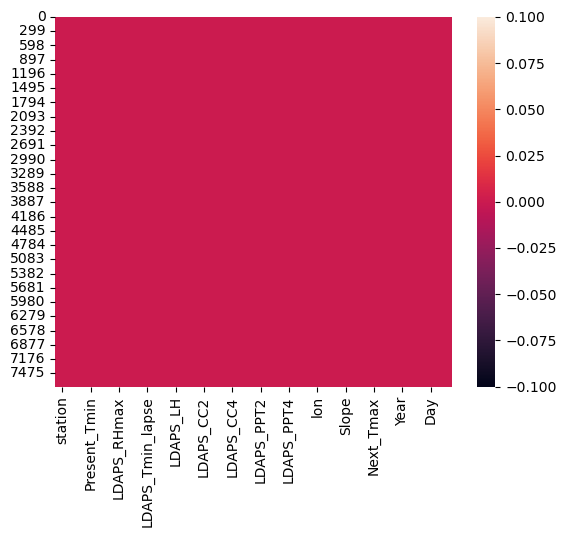

In [59]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe that all nan values are filled no nan is present

# Data visualization

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
28.2      1
14.9      1
29.5      1
13.4      1
12.9      1
Name: Next_Tmin, Length: 158, dtype: int64


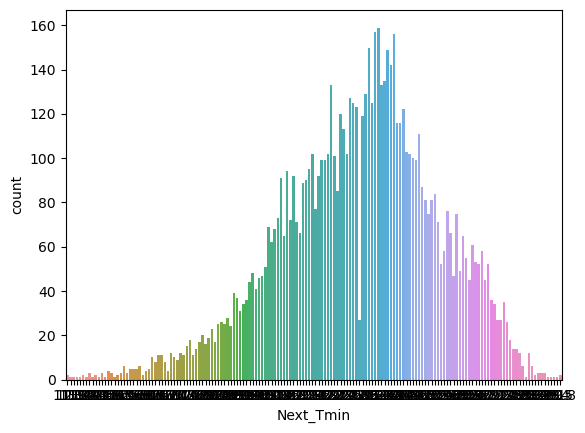

In [60]:
#visualizing the primary_fuel
ax=sns.countplot(x='Next_Tmin',data=df)
print(df['Next_Tmin'].value_counts())

We observe that coal is highly use as primary fuel

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
28.2      1
14.9      1
29.5      1
13.4      1
12.9      1
Name: Next_Tmin, Length: 158, dtype: int64


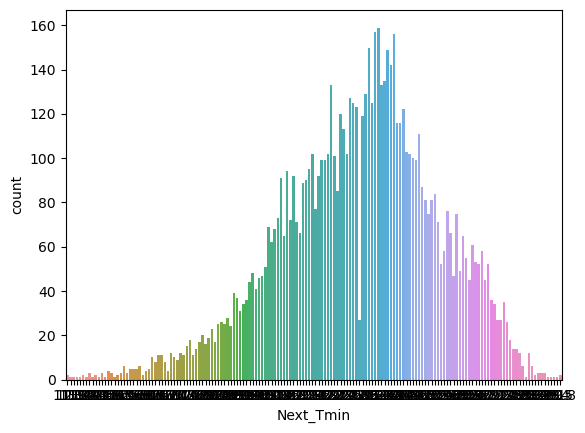

In [61]:
#visualizing the capacity_mw
ax=sns.countplot(x='Next_Tmin',data=df)
print(df['Next_Tmin'].value_counts())

13.0    312
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
1.0     310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


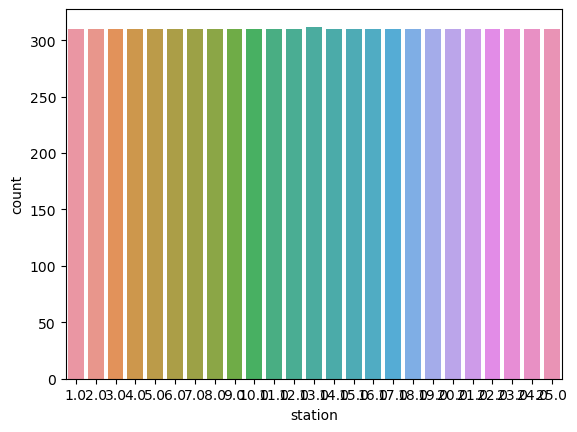

In [62]:
#visualizing the other_fuel1
ax=sns.countplot(x='station',data=df)
print(df['station'].value_counts())

37.5776    1240
37.5507    1240
37.6046     620
37.5102     620
37.4697     620
37.4967     620
37.5372     620
37.6181     620
37.5237     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64


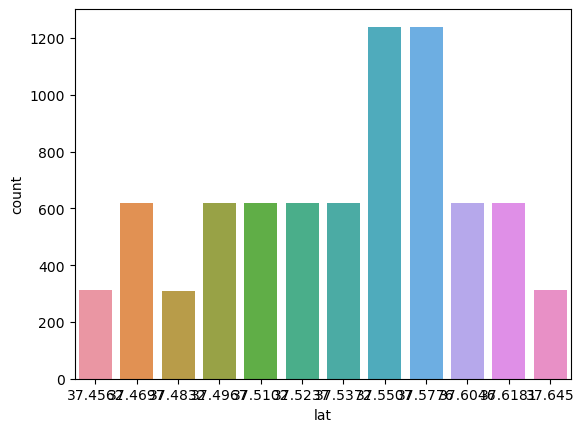

In [63]:
#visualizing the other_fuel1
ax=sns.countplot(x='lat',data=df)
print(df['lat'].value_counts())

[Text(0.5, 1.0, 'Effect of Solar radiation on capacity')]

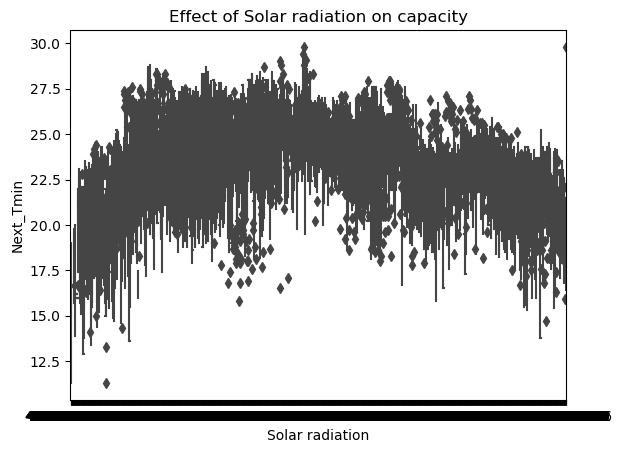

In [64]:
bp = sns.boxplot(x='Solar radiation',y='Next_Tmin', data=df)
bp.set(title="Effect of Solar radiation on capacity")

We observe that all the categorical column will converted in numerical column

# Description of data set

In [65]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day,DayOfWeek
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,2015.000516,7.080366,16.367776,3.003483
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.173245,33.567001,0.261185,...,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276,1.414487,2.238142,8.242663,2.000739
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,1.000000,4.000000,0.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,2014.000000,7.000000,8.000000,1.000000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.000000,3.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.000000,5.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.000000,6.000000


This gives the all statical information of the numerical columns.There is no negative or invalid value is present
hence we can say that it is perfect we can observe these points: 

    1.The counts of all columns are same it means there is no missing value in any column
    
    2.The mean value and median(50%) in all columns are apoximately equal so we can say that no skewness is present  
      
    3.There is  major difference beteen 75% and max in LDAPS_RHmin,LDAPS_LH,DEM	it means there is outliers are present in these columns
    
    4.In this discription min,std and 25% detail also found

# checking skewness

In [66]:
#checking skewness
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Year               -0.000365
Month              -0.704923
Day                 0.245589
DayOfWeek           0.000045
dtype: float64

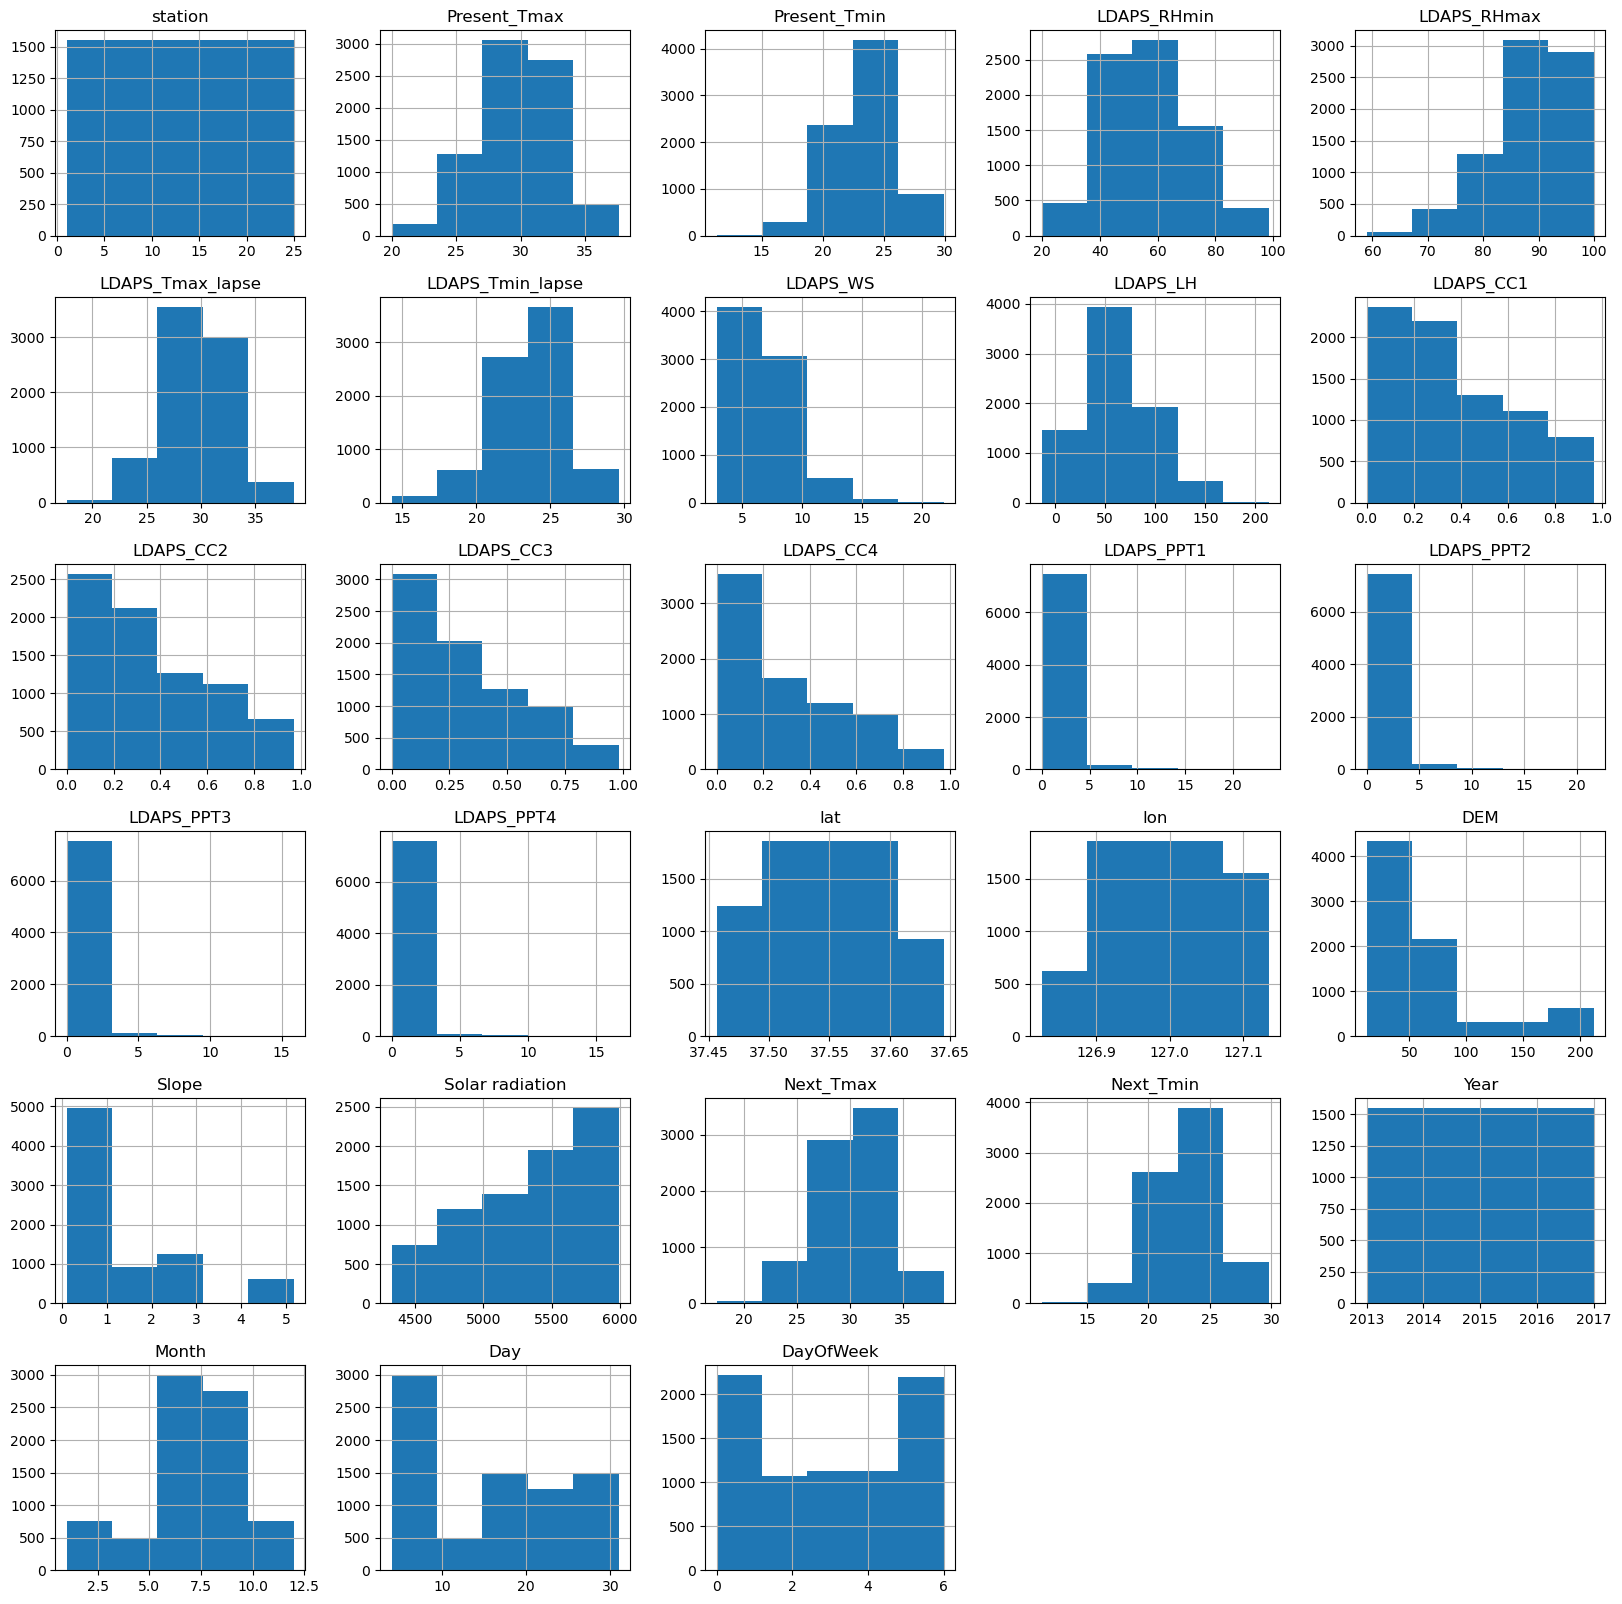

In [67]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

# Reduce skewness

In [68]:
df['LDAPS_CC1'] = np.cbrt(df['LDAPS_CC1'])

In [69]:
df['LDAPS_CC2'] = np.cbrt(df['LDAPS_CC2'])

In [70]:
df['LDAPS_CC3'] = np.cbrt(df['LDAPS_CC3'])

In [71]:
df['DEM'] = np.cbrt(df['DEM'])

In [72]:
df['Solar radiation'] = np.cbrt(df['Solar radiation'])

In [73]:
#checking skewness
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS            1.579236
LDAPS_LH            0.673757
LDAPS_CC1          -0.723387
LDAPS_CC2          -0.767698
LDAPS_CC3          -0.570388
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
lat                 0.087062
lon                -0.285213
DEM                 0.919779
Slope               1.563020
Solar radiation    -0.575391
Next_Tmax          -0.340200
Next_Tmin          -0.404447
Year               -0.000365
Month              -0.704923
Day                 0.245589
DayOfWeek           0.000045
dtype: float64

In [74]:
df.groupby('Next_Tmin').mean()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Year,Month,Day,DayOfWeek
Next_Tmin,,,,,,,,,,,,,,,,,,,,,
11.3,15.0,23.25,15.5,28.315367,70.703505,22.766475,15.159277,4.716992,61.343475,0.000000,...,37.53715,126.9625,3.040053,0.397737,16.451770,22.55,2016.5,7.0,15.0,4.0
12.9,17.0,22.60,14.6,35.059216,89.616730,26.112684,16.446214,5.147585,118.735384,0.433998,...,37.61810,127.0990,3.767385,0.697000,16.461234,26.80,2017.0,8.0,30.0,2.0
13.3,2.0,27.20,19.1,32.728909,72.317261,28.657923,17.326318,8.118150,80.069594,0.000000,...,37.60460,127.0320,3.550622,0.514100,16.608561,27.80,2016.0,8.0,26.0,4.0
13.4,17.0,22.30,17.2,44.535408,82.162903,25.822079,16.795643,9.319767,125.185385,0.685954,...,37.61810,127.0990,3.767385,0.697000,16.510002,25.90,2016.0,8.0,28.0,6.0
13.6,1.0,23.20,16.0,37.498943,88.812614,21.253708,14.907923,13.977458,130.884057,0.719523,...,37.60460,126.9910,5.965871,2.785000,16.742302,20.80,2017.0,8.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29.0,24.0,34.70,26.9,40.307629,74.048241,36.049266,28.319143,6.731115,65.284210,0.293661,...,37.52370,126.9090,2.586099,0.222300,17.442112,36.20,2017.0,4.0,8.0,5.0
29.1,18.0,35.50,24.7,49.515541,80.982201,34.259192,26.463737,10.515241,133.527939,0.752162,...,37.48320,127.0240,3.835965,1.231300,17.532811,35.60,2014.0,1.0,8.0,2.0
29.4,7.0,34.00,25.3,51.424961,82.626305,34.241860,25.966906,10.139871,200.411451,0.754820,...,37.57760,126.8380,2.312721,0.098500,17.524888,34.30,2014.0,1.0,8.0,2.0


we observe that in 2019 highest capacity_mw is seen where latitude is 18 and primary fuel as coal have high capacity of plant

In [75]:
df.groupby('Next_Tmax').mean()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Year,Month,Day,DayOfWeek
Next_Tmax,,,,,,,,,,,,,,,,,,,,,
17.4,7.0,20.900000,13.25,57.798975,78.872675,17.624954,14.496338,10.326384,20.919548,0.455854,...,37.5304,126.9085,4.139296,1.441737,16.449674,12.85,2016.5,7.000000,17.000000,2.500000
18.6,12.0,22.800000,17.30,84.476212,91.216560,19.906336,16.139425,15.011019,78.254321,0.907777,...,37.5507,126.9880,5.093160,0.593100,16.464409,15.00,2016.0,8.000000,30.000000,1.000000
18.9,19.0,24.500000,16.40,88.271400,93.264801,19.213062,16.383584,13.708569,74.319497,0.910220,...,37.5776,126.9380,4.218894,1.767800,16.455083,16.00,2016.0,8.000000,30.000000,1.000000
19.5,20.0,24.100000,17.90,98.194176,99.427292,17.835558,14.791082,20.113253,30.171732,0.901600,...,37.6181,127.0040,5.272289,4.729600,16.528412,15.80,2016.0,8.000000,30.000000,1.000000
19.7,17.0,23.800000,14.40,86.581261,91.547859,19.173606,16.244028,11.566213,68.801926,0.921082,...,37.6181,127.0990,3.767385,0.697000,16.411700,16.20,2016.0,8.000000,30.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37.8,18.0,34.433333,26.80,51.856557,86.749603,31.961564,25.266485,5.741458,89.964121,0.732351,...,37.4832,127.0240,3.835965,1.231300,17.290083,26.70,2016.0,8.666667,13.666667,2.666667
37.9,18.0,36.700000,28.40,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.717111,...,37.4832,127.0240,3.835965,1.231300,16.844355,28.00,2016.0,8.000000,20.000000,5.000000
38.3,18.0,35.100000,25.20,45.116577,88.021255,34.312149,25.969061,4.892935,111.399469,0.618801,...,37.4832,127.0240,3.835965,1.231300,17.449215,26.70,2016.0,3.000000,8.000000,1.000000


we observe that maximum bags are conventional type and with high percentage of volume

# Correlation Matrix and Heatmap

In [76]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day,DayOfWeek
station,1.000000e+00,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,0.010438,...,-0.118704,-0.287338,-0.090061,-0.018592,0.107983,0.128293,1.435463e-15,-2.350909e-17,3.154856e-17,2.146136e-17
Present_Tmax,1.126554e-01,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.283273,...,0.009020,-0.172526,-0.105809,-0.017192,0.610348,0.622741,5.966517e-02,-1.109917e-03,-1.436384e-01,-3.327728e-02
Present_Tmin,1.316462e-01,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.106818,...,-0.043461,-0.256285,-0.146339,0.066246,0.471806,0.796670,3.698749e-02,-3.298027e-03,-1.078176e-01,1.723840e-02
LDAPS_RHmin,-6.673316e-02,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.590149,...,-0.076237,0.089954,0.123744,0.246324,-0.437898,0.095019,-1.983986e-03,-5.395908e-02,-6.588166e-02,1.764313e-02
LDAPS_RHmax,-1.669845e-01,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.420370,...,0.025667,0.180116,0.219599,0.150997,-0.283738,-0.071997,-1.422495e-01,-3.983361e-02,-1.252113e-02,4.194152e-02
LDAPS_Tmax_lapse,6.910718e-02,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.389329,...,0.090666,-0.161834,-0.162332,0.057484,0.827189,0.586868,1.597769e-02,-2.162428e-02,-1.600728e-01,1.722477e-02
LDAPS_Tmin_lapse,1.047582e-01,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.080872,...,-0.026701,-0.197767,-0.185849,0.173617,0.586983,0.880176,-4.937088e-03,-2.741136e-02,-1.776429e-01,1.993292e-02
LDAPS_WS,5.277000e-03,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.246767,...,-0.059466,0.174483,0.171629,0.117525,-0.342729,-0.096576,-1.104439e-01,-8.158750e-02,-3.006570e-02,-5.688856e-02
LDAPS_LH,-1.333566e-01,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.173643,...,0.025822,0.041257,0.086781,-0.047045,0.157616,-0.055440,5.746912e-02,-2.288588e-02,-1.252283e-02,-1.938040e-02
LDAPS_CC1,1.043755e-02,-0.283273,0.106818,0.590149,0.420370,-0.389329,0.080872,0.246767,-0.173643,1.000000,...,-0.010809,-0.018905,-0.024640,0.208582,-0.389206,0.055270,-8.045527e-02,-8.530373e-02,-2.661447e-02,1.785812e-02


In [77]:
correlations = df.corr()['Next_Tmin'].sort_values(ascending=False)
print(correlations)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.880176
Present_Tmin        0.796670
Present_Tmax        0.622741
Next_Tmax           0.621427
LDAPS_Tmax_lapse    0.586868
Solar radiation     0.133333
station             0.128293
LDAPS_RHmin         0.095019
LDAPS_CC2           0.089324
LDAPS_CC1           0.055270
DayOfWeek           0.025076
Year                0.022780
LDAPS_PPT1          0.021323
LDAPS_CC3           0.002930
LDAPS_PPT2         -0.008058
Month              -0.024303
lon                -0.046603
LDAPS_LH           -0.055440
LDAPS_PPT3         -0.062622
LDAPS_RHmax        -0.071997
lat                -0.083533
LDAPS_CC4          -0.085093
LDAPS_WS           -0.096576
LDAPS_PPT4         -0.103682
Day                -0.128930
Slope              -0.146882
DEM                -0.254005
Name: Next_Tmin, dtype: float64


<Axes: >

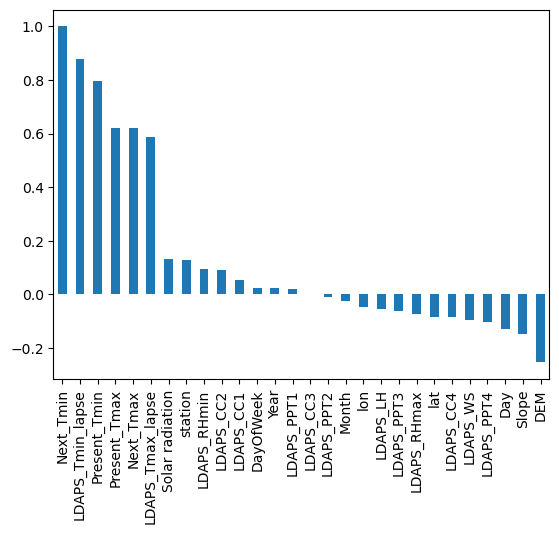

In [78]:
correlations.plot(kind='bar')

From this barplot we can observe, some obvious feature correlations such as AveragePrice,Total Volume,4046, 4225,4770,Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region are  positively correlated correlated, barplot show value between +0.2

<Axes: >

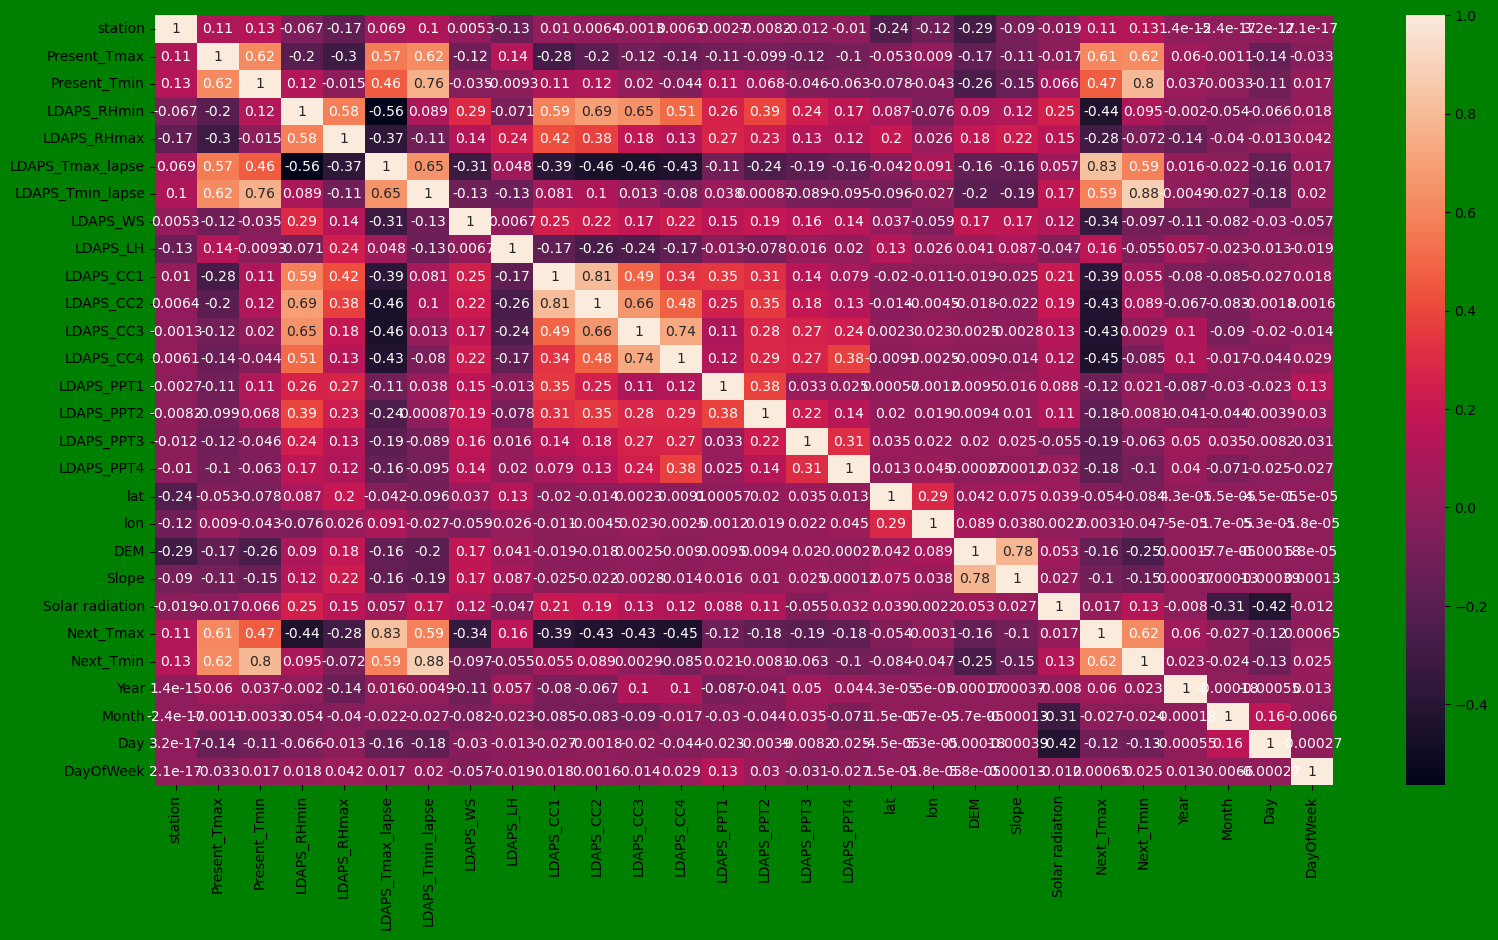

In [79]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

From this heatmap we can observe, some obvious feature correlations such as 4046,4225,4770,total bag is highly correlated with  Total Volume up td 0.91 and 4046,4225,4770 also high correlated with three type of bag so we will drop high correlated features  we have observe that type ,year, region are negatively correlated . so we are going to stablish a minimum threshold of correlation approximately around 0.2 (absolut value) since we do not have to take into account features whose values might be redundant and not provide information at all.

In [80]:
print(abs(correlations) > 0.2)

Next_Tmin            True
LDAPS_Tmin_lapse     True
Present_Tmin         True
Present_Tmax         True
Next_Tmax            True
LDAPS_Tmax_lapse     True
Solar radiation     False
station             False
LDAPS_RHmin         False
LDAPS_CC2           False
LDAPS_CC1           False
DayOfWeek           False
Year                False
LDAPS_PPT1          False
LDAPS_CC3           False
LDAPS_PPT2          False
Month               False
lon                 False
LDAPS_LH            False
LDAPS_PPT3          False
LDAPS_RHmax         False
lat                 False
LDAPS_CC4           False
LDAPS_WS            False
LDAPS_PPT4          False
Day                 False
Slope               False
DEM                  True
Name: Next_Tmin, dtype: bool


From all the values, we are selecting 4046,4225,4770,total bag in order to study them better and see the distribution of values that separate the different qualities these are negatively effect region

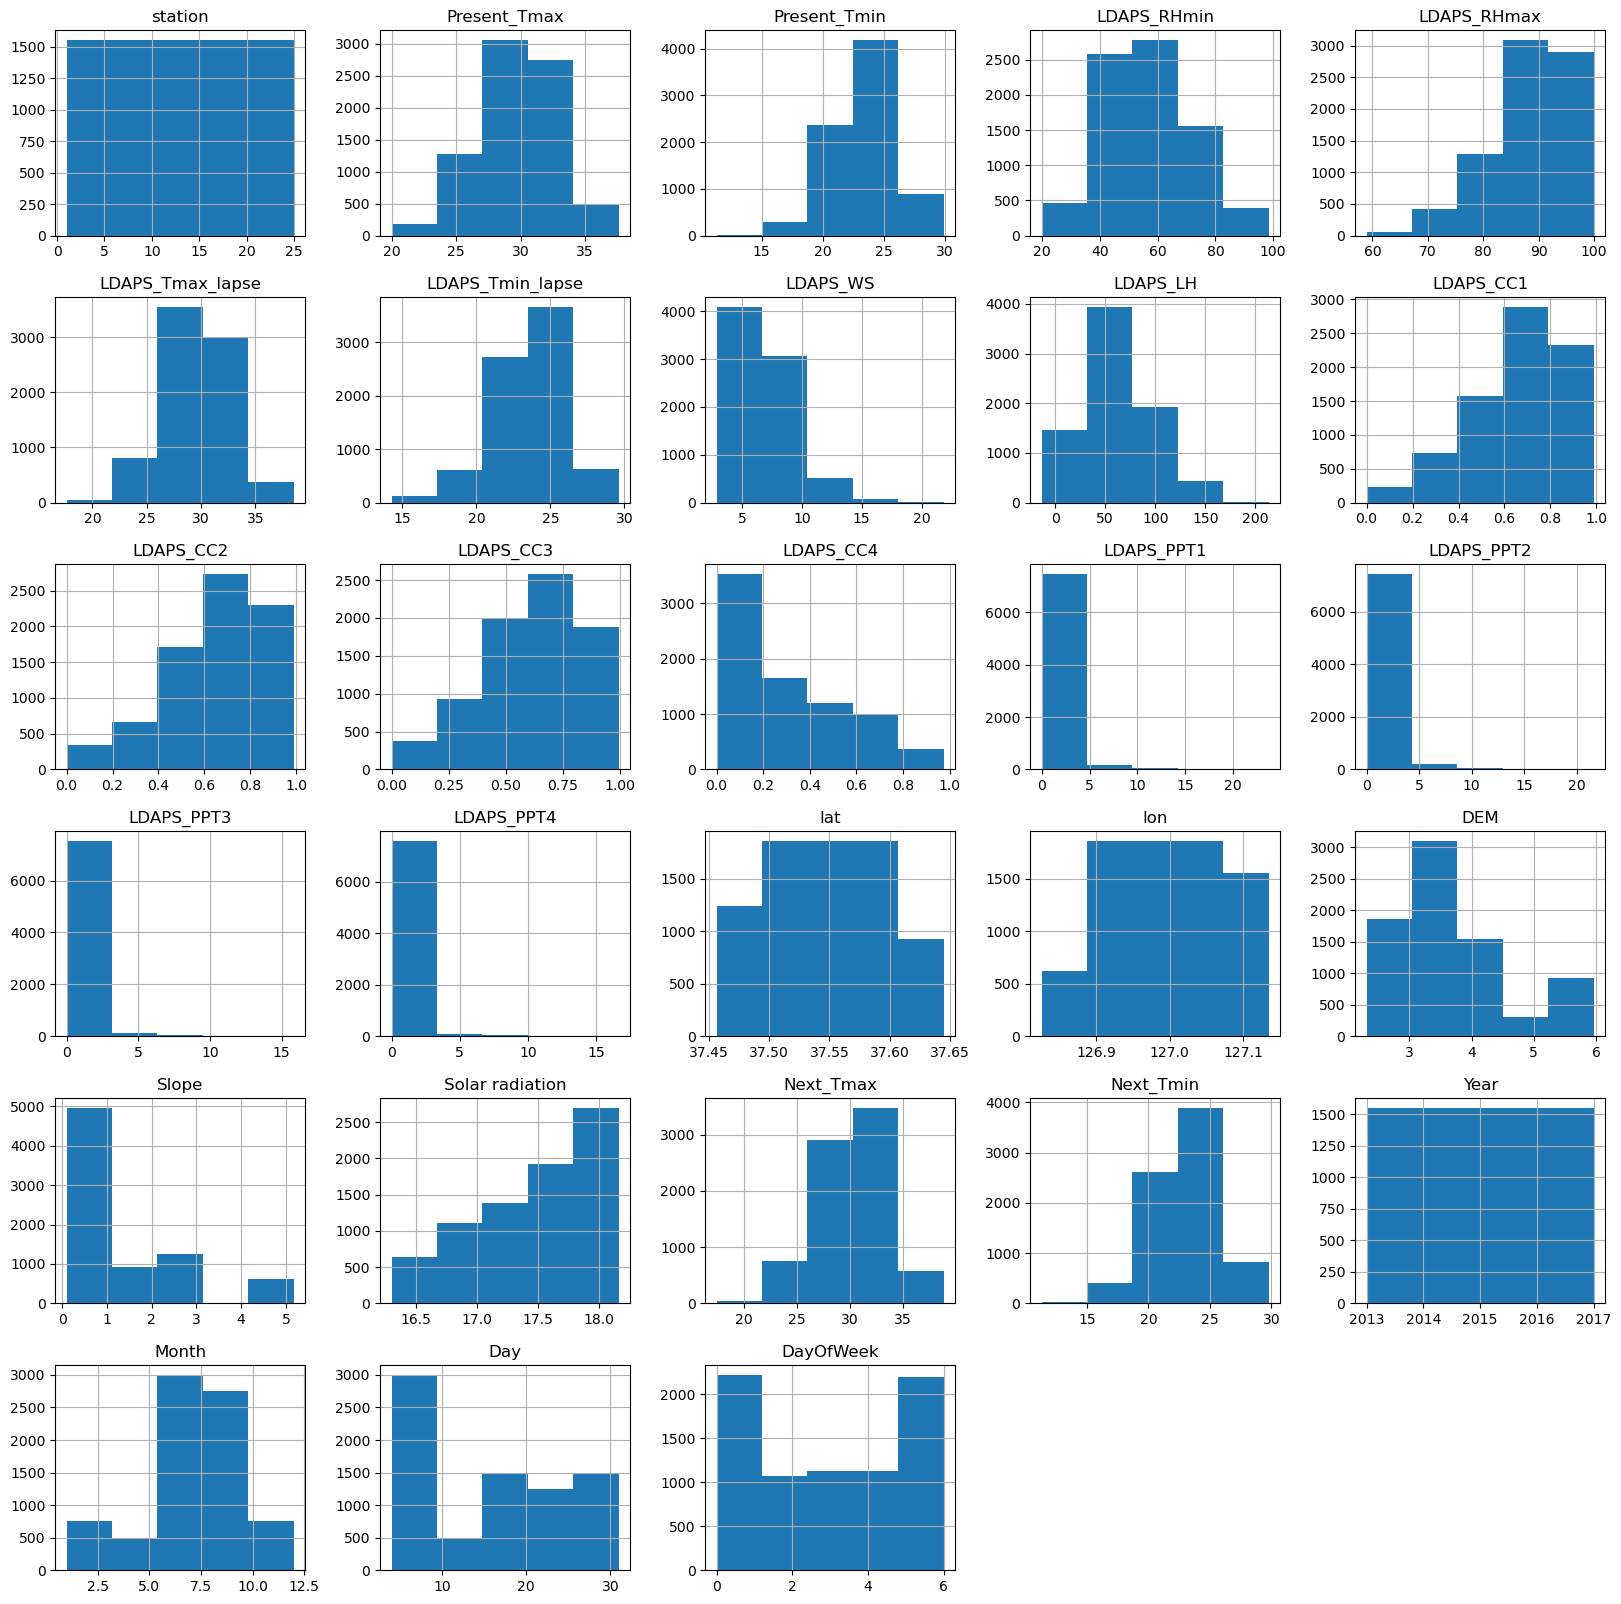

In [81]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

we observe now all features are normaly distributed

In [82]:
df = df.drop(['LDAPS_Tmax_lapse'], axis=1)

In [83]:
df = df.drop(['LDAPS_Tmin_lapse'], axis=1)

# Feature Selection

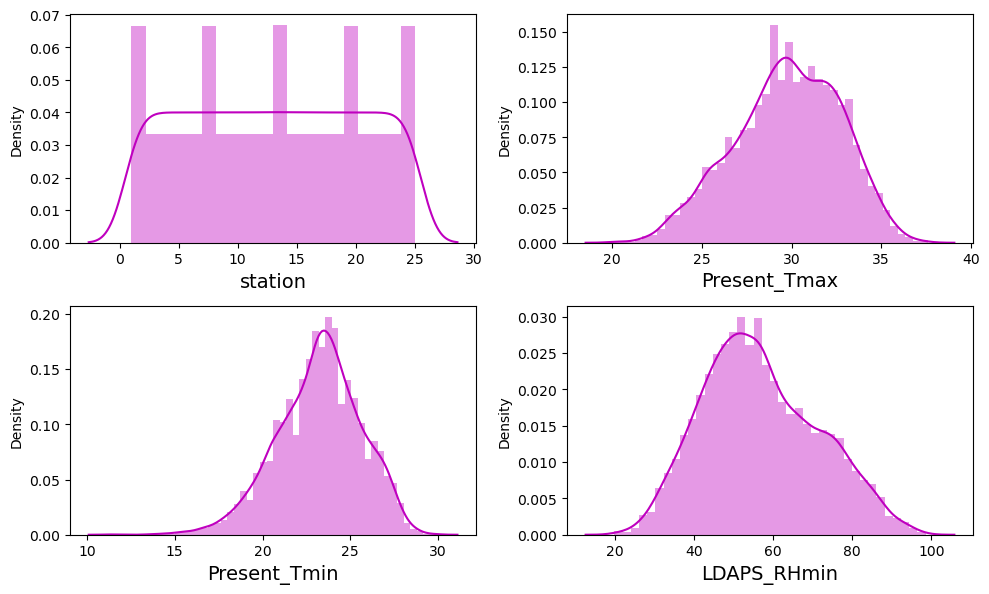

In [84]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

we obseve that all featutes are normaly distributed

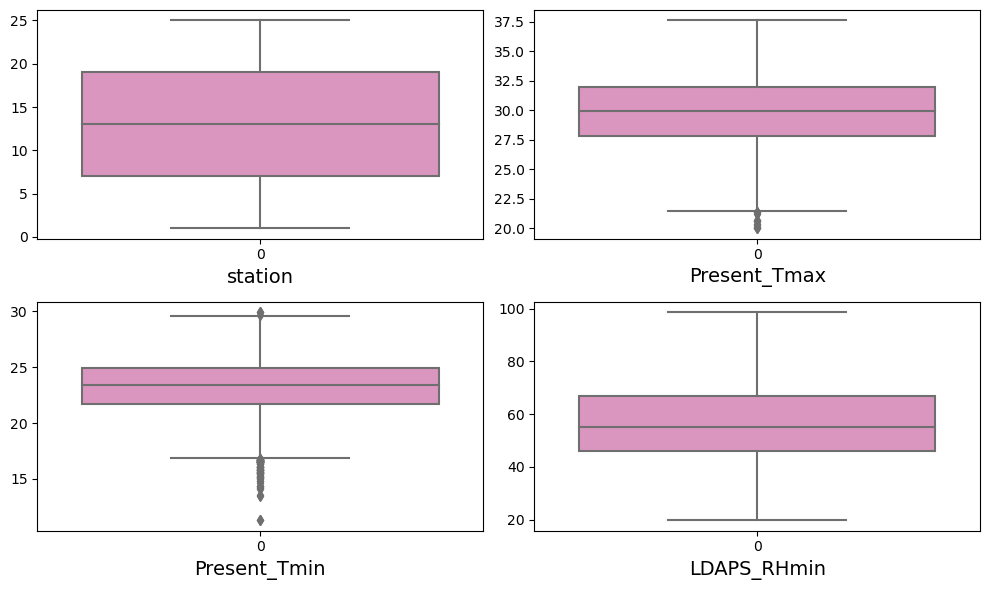

In [85]:
#checking for outliers
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

In [86]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day,DayOfWeek
0,1.0,28.7,21.4,58.255688,91.116364,6.818887,69.451805,0.616178,0.588576,0.544796,...,126.991,5.965871,2.785000,18.164032,29.1,21.2,2013.0,6.0,30.0,6.0
1,2.0,31.9,21.6,52.263397,90.604721,5.691890,51.937448,0.608678,0.631445,0.542254,...,127.032,3.550622,0.514100,18.038306,30.5,22.5,2013.0,6.0,30.0,6.0
2,3.0,31.6,23.3,48.690479,83.973587,6.138224,20.573050,0.593772,0.636173,0.588764,...,127.058,3.217444,0.266100,18.032406,31.1,23.9,2013.0,6.0,30.0,6.0
3,4.0,32.0,23.4,58.239788,96.483688,5.650050,65.727144,0.600344,0.609122,0.544189,...,127.022,3.575659,2.534800,18.025647,31.7,24.3,2013.0,6.0,30.0,6.0
4,5.0,31.4,21.9,56.174095,90.155128,5.735004,107.965535,0.532985,0.629957,0.563461,...,127.135,3.272250,0.505500,18.028301,31.2,22.5,2013.0,6.0,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,6.148918,72.058294,0.310841,0.432737,0.000000,...,126.891,2.498004,0.155400,16.440020,28.3,18.1,2017.0,8.0,30.0,2.0
7748,24.0,23.3,17.7,24.040634,77.294975,6.542819,47.241457,0.329807,0.421646,0.000000,...,126.909,2.586099,0.222300,16.433924,28.6,18.8,2017.0,8.0,30.0,2.0
7749,25.0,23.2,17.4,22.933014,77.243744,7.289264,9.090034,0.365815,0.391201,0.000000,...,126.970,2.695484,0.271300,16.449919,27.8,17.4,2017.0,8.0,30.0,2.0
7750,13.0,20.0,11.3,19.794666,58.936283,2.882580,-13.603212,0.000000,0.000000,0.000000,...,126.826,2.312721,0.098475,16.298461,17.4,11.3,2017.0,6.0,4.0,4.0


we observe now all features are  normaly distributed 

we observe that all features are balanced

# Separating feature and target

In [87]:
x_Tmin = df.drop(['Next_Tmin'], axis=1)
y_Tmin = df['Next_Tmin']

In [88]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day,DayOfWeek
0,1.0,28.7,21.4,58.255688,91.116364,6.818887,69.451805,0.616178,0.588576,0.544796,...,126.991,5.965871,2.785000,18.164032,29.1,21.2,2013.0,6.0,30.0,6.0
1,2.0,31.9,21.6,52.263397,90.604721,5.691890,51.937448,0.608678,0.631445,0.542254,...,127.032,3.550622,0.514100,18.038306,30.5,22.5,2013.0,6.0,30.0,6.0
2,3.0,31.6,23.3,48.690479,83.973587,6.138224,20.573050,0.593772,0.636173,0.588764,...,127.058,3.217444,0.266100,18.032406,31.1,23.9,2013.0,6.0,30.0,6.0
3,4.0,32.0,23.4,58.239788,96.483688,5.650050,65.727144,0.600344,0.609122,0.544189,...,127.022,3.575659,2.534800,18.025647,31.7,24.3,2013.0,6.0,30.0,6.0
4,5.0,31.4,21.9,56.174095,90.155128,5.735004,107.965535,0.532985,0.629957,0.563461,...,127.135,3.272250,0.505500,18.028301,31.2,22.5,2013.0,6.0,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,6.148918,72.058294,0.310841,0.432737,0.000000,...,126.891,2.498004,0.155400,16.440020,28.3,18.1,2017.0,8.0,30.0,2.0
7748,24.0,23.3,17.7,24.040634,77.294975,6.542819,47.241457,0.329807,0.421646,0.000000,...,126.909,2.586099,0.222300,16.433924,28.6,18.8,2017.0,8.0,30.0,2.0
7749,25.0,23.2,17.4,22.933014,77.243744,7.289264,9.090034,0.365815,0.391201,0.000000,...,126.970,2.695484,0.271300,16.449919,27.8,17.4,2017.0,8.0,30.0,2.0
7750,13.0,20.0,11.3,19.794666,58.936283,2.882580,-13.603212,0.000000,0.000000,0.000000,...,126.826,2.312721,0.098475,16.298461,17.4,11.3,2017.0,6.0,4.0,4.0


In [89]:
x_Tmin.shape

(7752, 25)

In [90]:
y_Tmin.shape

(7752,)

# checking variance inflation Factor(vif)

In [91]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x_Tmin.values, i)
                    for i in range (len(x_Tmin.columns))]
vif["Features"] = x_Tmin.columns
vif

,VIF values,Features
0,5.380787e+00,station
1,2.695246e+02,Present_Tmax
2,2.295111e+02,Present_Tmin
3,6.089829e+01,LDAPS_RHmin
4,3.541406e+02,LDAPS_RHmax
5,1.562441e+01,LDAPS_WS
6,6.228932e+00,LDAPS_LH
7,3.776766e+01,LDAPS_CC1
8,4.435485e+01,LDAPS_CC2
9,3.171764e+01,LDAPS_CC3


we observe by checking vif values there is no column have vif more than 10 so there is no multicollinerity problem. 

In [92]:
y_Tmin.value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
28.2      1
14.9      1
29.5      1
13.4      1
12.9      1
Name: Next_Tmin, Length: 158, dtype: int64

# oversampling

In [93]:
x_Tmin.columns = x_Tmin.columns.astype(str)

In [94]:
x_Tmin

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Year,Month,Day,DayOfWeek
0,1.0,28.7,21.4,58.255688,91.116364,6.818887,69.451805,0.616178,0.588576,0.544796,...,37.6046,126.991,5.965871,2.785000,18.164032,29.1,2013.0,6.0,30.0,6.0
1,2.0,31.9,21.6,52.263397,90.604721,5.691890,51.937448,0.608678,0.631445,0.542254,...,37.6046,127.032,3.550622,0.514100,18.038306,30.5,2013.0,6.0,30.0,6.0
2,3.0,31.6,23.3,48.690479,83.973587,6.138224,20.573050,0.593772,0.636173,0.588764,...,37.5776,127.058,3.217444,0.266100,18.032406,31.1,2013.0,6.0,30.0,6.0
3,4.0,32.0,23.4,58.239788,96.483688,5.650050,65.727144,0.600344,0.609122,0.544189,...,37.6450,127.022,3.575659,2.534800,18.025647,31.7,2013.0,6.0,30.0,6.0
4,5.0,31.4,21.9,56.174095,90.155128,5.735004,107.965535,0.532985,0.629957,0.563461,...,37.5507,127.135,3.272250,0.505500,18.028301,31.2,2013.0,6.0,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,6.148918,72.058294,0.310841,0.432737,0.000000,...,37.5372,126.891,2.498004,0.155400,16.440020,28.3,2017.0,8.0,30.0,2.0
7748,24.0,23.3,17.7,24.040634,77.294975,6.542819,47.241457,0.329807,0.421646,0.000000,...,37.5237,126.909,2.586099,0.222300,16.433924,28.6,2017.0,8.0,30.0,2.0
7749,25.0,23.2,17.4,22.933014,77.243744,7.289264,9.090034,0.365815,0.391201,0.000000,...,37.5237,126.970,2.695484,0.271300,16.449919,27.8,2017.0,8.0,30.0,2.0
7750,13.0,20.0,11.3,19.794666,58.936283,2.882580,-13.603212,0.000000,0.000000,0.000000,...,37.4562,126.826,2.312721,0.098475,16.298461,17.4,2017.0,6.0,4.0,4.0


# Model Creation

Finding the best random state

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# creating train test split

In [96]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_Tmin_train, x_Tmin_test, y_Tmin_train, y_Tmin_test = train_test_split(x_Tmin, y_Tmin, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_Tmin_train, y_Tmin_train)
    pred = lr.predict(x_Tmin_test)
    acc = r2_score(y_Tmin_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Maximum r2 score is =",  maxAccu, "on random_state ", maxRS)

Maximum r2 score is = 0.7982487744259577 on random_state  69


In [97]:
x_Tmin_train, x_Tmin_test, y_Tmin_train, y_Tmin_test = train_test_split(x_Tmin, y_Tmin, test_size = 0.30, random_state= maxRS)

# Linear Regression algorithms

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge


In [99]:
LR = LinearRegression()
LR.fit(x_Tmin_train,y_Tmin_train)
pred_LR= LR.predict(x_Tmin_test)
pred_train=LR.predict(x_Tmin_train)
print('R2_score:',r2_score(y_Tmin_test,pred_LR)) 
print('R2_score on training Data:',r2_score(y_Tmin_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_Tmin_test, pred_LR)) 
print('Mean_Squared_Error:',mean_squared_error(y_Tmin_test, pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_Tmin_test, pred_LR)))

R2_score: 0.7982487744259577
R2_score on training Data: 77.92881491801165
Mean_Absolute_Error: 0.8829561483854064
Mean_Squared_Error: 1.2558658855021052
Root Mean Squared Error: 1.1206542220962294


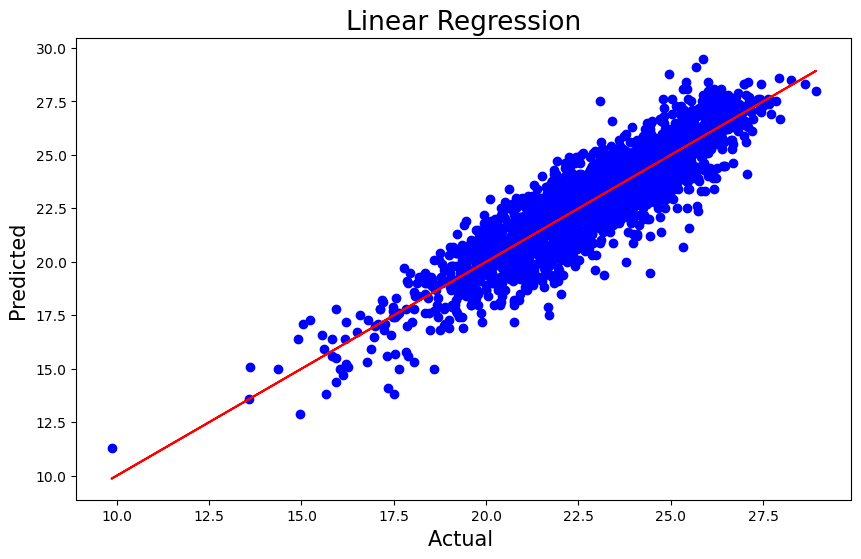

In [100]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_Tmin_test,color='b')
plt.plot(pred_LR,pred_LR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Linear Regression",fontsize=19)
plt.show()

In [101]:
RFR = RandomForestRegressor()
RFR.fit(x_Tmin_train,y_Tmin_train)
pred_RFR= RFR.predict(x_Tmin_test)
pred_train=RFR.predict(x_Tmin_train)
print('R2_score:',r2_score(y_Tmin_test,pred_RFR)) 
print('R2_score on training Data:',r2_score(y_Tmin_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_Tmin_test, pred_RFR)) 
print('Mean_Squared_Error:',mean_squared_error(y_Tmin_test, pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_Tmin_test, pred_RFR)))

R2_score: 0.9096504942310831
R2_score on training Data: 98.58874992288563
Mean_Absolute_Error: 0.5538851684211407
Mean_Squared_Error: 0.562409778400658
Root Mean Squared Error: 0.7499398498550787


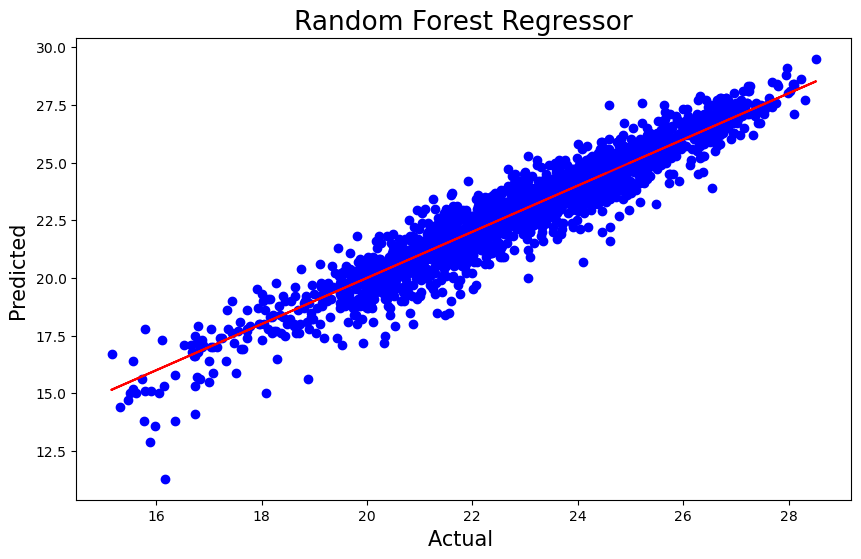

In [102]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_RFR,y=y_Tmin_test,color='b')
plt.plot(pred_RFR,pred_RFR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Random Forest Regressor",fontsize=19)
plt.show()

In [103]:
GBR=GradientBoostingRegressor()
GBR.fit(x_Tmin_train,y_Tmin_train)
pred_GBR= GBR.predict(x_Tmin_test)
pred_train=GBR.predict(x_Tmin_train)
print('R2_score:',r2_score(y_Tmin_test,pred_GBR)) 
print('R2_score on training Data:',r2_score(y_Tmin_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_Tmin_test, pred_GBR)) 
print('Mean_Squared_Error:',mean_squared_error(y_Tmin_test, pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_Tmin_test, pred_GBR)))

R2_score: 0.8608987629367352
R2_score on training Data: 88.02490530769417
Mean_Absolute_Error: 0.7296669234279468
Mean_Squared_Error: 0.8658807289117733
Root Mean Squared Error: 0.9305271242214131


In [104]:
lasso=Lasso()
lasso.fit(x_Tmin_train,y_Tmin_train)
pred_lasso= lasso.predict(x_Tmin_test)
pred_train=lasso.predict(x_Tmin_train)
print('R2_score:',r2_score(y_Tmin_test,pred_lasso)) 
print('R2_score on training Data:',r2_score(y_Tmin_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_Tmin_test, pred_lasso)) 
print('Mean_Squared_Error:',mean_squared_error(y_Tmin_test, pred_lasso))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_Tmin_test, pred_lasso)))

R2_score: 0.7424419709175762
R2_score on training Data: 72.44465006050247
Mean_Absolute_Error: 1.0037440442758656
Mean_Squared_Error: 1.6032534193606
Root Mean Squared Error: 1.2661964379039297


In [105]:
rd=Ridge()
rd.fit(x_Tmin_train,y_Tmin_train)
pred_rd= rd.predict(x_Tmin_test)
pred_train=rd.predict(x_Tmin_train)
print('R2_score:',r2_score(y_Tmin_test,pred_rd)) 
print('R2_score on training Data:',r2_score(y_Tmin_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_Tmin_test, pred_rd)) 
print('Mean_Squared_Error:',mean_squared_error(y_Tmin_test, pred_rd))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_Tmin_test, pred_rd)))

R2_score: 0.7982373359981366
R2_score on training Data: 77.92840456492569
Mean_Absolute_Error: 0.8829949121446092
Mean_Squared_Error: 1.2559370877029512
Root Mean Squared Error: 1.120685989786145


In [106]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_Tmin_train,y_Tmin_train)
pred_DTR= dtr.predict(x_Tmin_test)
pred_train=dtr.predict(x_Tmin_train)
print('R2_score:',r2_score(y_Tmin_test,pred_DTR)) 
print('R2_score on training Data:',r2_score(y_Tmin_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_Tmin_test, pred_DTR)) 
print('Mean_Squared_Error:',mean_squared_error(y_Tmin_test, pred_DTR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_Tmin_test, pred_DTR)))

R2_score: 0.7391134121149303
R2_score on training Data: 100.0
Mean_Absolute_Error: 0.8768286069672508
Mean_Squared_Error: 1.623973112320267
Root Mean Squared Error: 1.2743520362601015


In [107]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_Tmin_train,y_Tmin_train)
pred_SVR= svr.predict(x_Tmin_test)
pred_train=svr.predict(x_Tmin_train)
print('R2_score:',r2_score(y_Tmin_test,pred_SVR)) 
print('R2_score on training Data:',r2_score(y_Tmin_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_Tmin_test, pred_SVR)) 
print('Mean_Squared_Error:',mean_squared_error(y_Tmin_test, pred_SVR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_Tmin_test, pred_SVR)))

R2_score: 0.018391953782774362
R2_score on training Data: 2.0854801408009105
Mean_Absolute_Error: 1.9184127174640924
Mean_Squared_Error: 6.110337395329299
Root Mean Squared Error: 2.471909665689525


# Cross Validation Score

In [108]:
from sklearn.model_selection import cross_val_score

In [109]:
score = cross_val_score(LR,x_Tmin,y_Tmin)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_Tmin_test,pred_LR) - score.mean())*100)

[0.43432836 0.56902608 0.70400424 0.8569221  0.8017383 ]
0.6732038155301312
Difference between R2 score and cross validation score is : 12.504495889582646


In [110]:
score = cross_val_score(RFR,x_Tmin,y_Tmin)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_Tmin_test,pred_RFR) - score.mean())*100)

[0.38205231 0.52939544 0.663898   0.81512338 0.79761238]
0.6376163016953427
Difference between R2 score and cross validation score is : 27.203419253574047


In [111]:
score = cross_val_score(GBR,x_Tmin,y_Tmin)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_Tmin_test,pred_GBR) - score.mean())*100)

[0.45703861 0.56680504 0.69268914 0.83252824 0.83069314]
0.6759508353137779
Difference between R2 score and cross validation score is : 18.49479276229573


In [112]:
score = cross_val_score(lasso,x_Tmin,y_Tmin)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_Tmin_test,pred_lasso) - score.mean())*100)

[0.49720908 0.53341879 0.66970435 0.77706342 0.77523909]
0.6505269443826895
Difference between R2 score and cross validation score is : 9.19150265348867


In [113]:
score = cross_val_score(rd,x_Tmin,y_Tmin)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_Tmin_test,pred_rd) - score.mean())*100)

[0.43467418 0.56926417 0.70409897 0.85696257 0.80172705]
0.6733453895894332
Difference between R2 score and cross validation score is : 12.489194640870338


In [114]:
score = cross_val_score(dtr,x_Tmin,y_Tmin)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_Tmin_test,pred_DTR) - score.mean())*100)

[0.00188864 0.0090002  0.41523155 0.6443316  0.52843172]
0.3197767449080124
Difference between R2 score and cross validation score is : 41.93366672069179


In [115]:
score = cross_val_score(svr,x_Tmin,y_Tmin)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_Tmin_test,pred_SVR) - score.mean())*100)

[-0.15248253 -0.50848942 -0.12812822 -0.00912493  0.02736039]
-0.15417294038683854
Difference between R2 score and cross validation score is : 17.25648941696129


lasso(lasso) is our best model as the difference between R2 score and cross validation
score is : 9.19150265348867 and this is least out of all

finaly we observe that lasso(lasso) is our best model

# Hyper Parameter Tuning

In [116]:
# lasso(lasso)
from sklearn.model_selection import GridSearchCV



In [117]:
parameters={'copy_X':[True],
            'selection':['cyclic','random'],
            'alpha':[1.0,2.0],
            'random_state':[100,200],                
            'max_iter':[1000,2000]
            }

In [118]:
GCV=GridSearchCV(Lasso(),parameters, cv =5)

In [119]:
GCV.fit(x_Tmin,y_Tmin)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1.0, 2.0], 'copy_X': [True],
                         'max_iter': [1000, 2000], 'random_state': [100, 200],
                         'selection': ['cyclic', 'random']})

In [120]:
GCV.best_params_

{'alpha': 1.0,
 'copy_X': True,
 'max_iter': 1000,
 'random_state': 100,
 'selection': 'random'}

In [121]:
Final_model1= Lasso(alpha = 1.0,copy_X= True,max_iter =1000,random_state=200,selection= 'random')
Final_model1.fit(x_Tmin_train,y_Tmin_train)
pred = Final_model1.predict(x_Tmin_test)
print('R2_score:',r2_score(y_Tmin_test,pred)) 
print('Mean_Absolute_Error:',mean_absolute_error(y_Tmin_test, pred)) 
print('Mean_Squared_Error:',mean_squared_error(y_Tmin_test, pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_Tmin_test, pred)))

R2_score: 0.7424397364964211
Mean_Absolute_Error: 1.0037485640510708
Mean_Squared_Error: 1.6032673282391934
Root Mean Squared Error: 1.266201930277787


# Saving the model

In [122]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model1,"Second_Phase_Evaluation_Projects2_Temperature_Forecast_minimum_temperature_for_the_next_day_using_ML_Prediction_Project_Analysis.pkl")

['Second_Phase_Evaluation_Projects2_Temperature_Forecast_minimum_temperature_for_the_next_day_using_ML_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [123]:
# first we load the saved model and get prediction
model1= joblib.load("Second_Phase_Evaluation_Projects2_Temperature_Forecast_minimum_temperature_for_the_next_day_using_ML_Prediction_Project_Analysis.pkl")

#prediction
prediction1 = model1.predict(x_Tmin_test)
prediction1

array([24.34666562, 24.48778551, 22.49257216, ..., 24.25632916,
       24.67402062, 24.77851341])

# these are the prediction for the number of minimum_temperature_for_the_next_day

In [124]:
a1=np.array(y_Tmin_test)
df1 = pd.DataFrame()
df1["Predicted1"]  = prediction1
df1["Original1"] = a1
df1

,Predicted1,Original1
0,24.346666,25.4
1,24.487786,25.0
2,22.492572,22.4
3,24.114439,25.3
4,22.280048,22.6
...,...,...
2321,24.368155,23.4
2322,21.101839,20.0
2323,24.256329,26.5
2324,24.674021,27.1


# model for the number of maximum_temperature_for_the_next_day

In [125]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day,DayOfWeek
0,1.0,28.7,21.4,58.255688,91.116364,6.818887,69.451805,0.616178,0.588576,0.544796,...,126.991,5.965871,2.785000,18.164032,29.1,21.2,2013.0,6.0,30.0,6.0
1,2.0,31.9,21.6,52.263397,90.604721,5.691890,51.937448,0.608678,0.631445,0.542254,...,127.032,3.550622,0.514100,18.038306,30.5,22.5,2013.0,6.0,30.0,6.0
2,3.0,31.6,23.3,48.690479,83.973587,6.138224,20.573050,0.593772,0.636173,0.588764,...,127.058,3.217444,0.266100,18.032406,31.1,23.9,2013.0,6.0,30.0,6.0
3,4.0,32.0,23.4,58.239788,96.483688,5.650050,65.727144,0.600344,0.609122,0.544189,...,127.022,3.575659,2.534800,18.025647,31.7,24.3,2013.0,6.0,30.0,6.0
4,5.0,31.4,21.9,56.174095,90.155128,5.735004,107.965535,0.532985,0.629957,0.563461,...,127.135,3.272250,0.505500,18.028301,31.2,22.5,2013.0,6.0,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,6.148918,72.058294,0.310841,0.432737,0.000000,...,126.891,2.498004,0.155400,16.440020,28.3,18.1,2017.0,8.0,30.0,2.0
7748,24.0,23.3,17.7,24.040634,77.294975,6.542819,47.241457,0.329807,0.421646,0.000000,...,126.909,2.586099,0.222300,16.433924,28.6,18.8,2017.0,8.0,30.0,2.0
7749,25.0,23.2,17.4,22.933014,77.243744,7.289264,9.090034,0.365815,0.391201,0.000000,...,126.970,2.695484,0.271300,16.449919,27.8,17.4,2017.0,8.0,30.0,2.0
7750,13.0,20.0,11.3,19.794666,58.936283,2.882580,-13.603212,0.000000,0.000000,0.000000,...,126.826,2.312721,0.098475,16.298461,17.4,11.3,2017.0,6.0,4.0,4.0


# Separating feature and target

In [126]:
x_Tmax = df.drop(['Next_Tmax'], axis=1)
y_Tmax = df['Next_Tmax']

In [127]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day,DayOfWeek
0,1.0,28.7,21.4,58.255688,91.116364,6.818887,69.451805,0.616178,0.588576,0.544796,...,126.991,5.965871,2.785000,18.164032,29.1,21.2,2013.0,6.0,30.0,6.0
1,2.0,31.9,21.6,52.263397,90.604721,5.691890,51.937448,0.608678,0.631445,0.542254,...,127.032,3.550622,0.514100,18.038306,30.5,22.5,2013.0,6.0,30.0,6.0
2,3.0,31.6,23.3,48.690479,83.973587,6.138224,20.573050,0.593772,0.636173,0.588764,...,127.058,3.217444,0.266100,18.032406,31.1,23.9,2013.0,6.0,30.0,6.0
3,4.0,32.0,23.4,58.239788,96.483688,5.650050,65.727144,0.600344,0.609122,0.544189,...,127.022,3.575659,2.534800,18.025647,31.7,24.3,2013.0,6.0,30.0,6.0
4,5.0,31.4,21.9,56.174095,90.155128,5.735004,107.965535,0.532985,0.629957,0.563461,...,127.135,3.272250,0.505500,18.028301,31.2,22.5,2013.0,6.0,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,6.148918,72.058294,0.310841,0.432737,0.000000,...,126.891,2.498004,0.155400,16.440020,28.3,18.1,2017.0,8.0,30.0,2.0
7748,24.0,23.3,17.7,24.040634,77.294975,6.542819,47.241457,0.329807,0.421646,0.000000,...,126.909,2.586099,0.222300,16.433924,28.6,18.8,2017.0,8.0,30.0,2.0
7749,25.0,23.2,17.4,22.933014,77.243744,7.289264,9.090034,0.365815,0.391201,0.000000,...,126.970,2.695484,0.271300,16.449919,27.8,17.4,2017.0,8.0,30.0,2.0
7750,13.0,20.0,11.3,19.794666,58.936283,2.882580,-13.603212,0.000000,0.000000,0.000000,...,126.826,2.312721,0.098475,16.298461,17.4,11.3,2017.0,6.0,4.0,4.0


In [128]:
x_Tmax.shape

(7752, 25)

In [129]:
y_Tmax.shape

(7752,)

# checking variance inflation Factor(vif)

In [130]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x_Tmax.values, i)
                    for i in range (len(x_Tmax.columns))]
vif["Features"] = x_Tmax.columns
vif

,VIF values,Features
0,5.366588e+00,station
1,2.682571e+02,Present_Tmax
2,3.138398e+02,Present_Tmin
3,6.094901e+01,LDAPS_RHmin
4,3.546792e+02,LDAPS_RHmax
5,1.456713e+01,LDAPS_WS
6,6.304618e+00,LDAPS_LH
7,3.776293e+01,LDAPS_CC1
8,4.396837e+01,LDAPS_CC2
9,3.169028e+01,LDAPS_CC3


we observe by checking vif values there is no column have vif more than 10 so there is no multicollinerity problem

In [131]:
y_Tmax.value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.5      1
38.7      1
37.4      1
20.9      1
21.8      1
Name: Next_Tmax, Length: 184, dtype: int64

# oversampling

In [132]:
x_Tmax.columns = x_Tmax.columns.astype(str)

In [133]:
x_Tmax

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Year,Month,Day,DayOfWeek
0,1.0,28.7,21.4,58.255688,91.116364,6.818887,69.451805,0.616178,0.588576,0.544796,...,37.6046,126.991,5.965871,2.785000,18.164032,21.2,2013.0,6.0,30.0,6.0
1,2.0,31.9,21.6,52.263397,90.604721,5.691890,51.937448,0.608678,0.631445,0.542254,...,37.6046,127.032,3.550622,0.514100,18.038306,22.5,2013.0,6.0,30.0,6.0
2,3.0,31.6,23.3,48.690479,83.973587,6.138224,20.573050,0.593772,0.636173,0.588764,...,37.5776,127.058,3.217444,0.266100,18.032406,23.9,2013.0,6.0,30.0,6.0
3,4.0,32.0,23.4,58.239788,96.483688,5.650050,65.727144,0.600344,0.609122,0.544189,...,37.6450,127.022,3.575659,2.534800,18.025647,24.3,2013.0,6.0,30.0,6.0
4,5.0,31.4,21.9,56.174095,90.155128,5.735004,107.965535,0.532985,0.629957,0.563461,...,37.5507,127.135,3.272250,0.505500,18.028301,22.5,2013.0,6.0,30.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,6.148918,72.058294,0.310841,0.432737,0.000000,...,37.5372,126.891,2.498004,0.155400,16.440020,18.1,2017.0,8.0,30.0,2.0
7748,24.0,23.3,17.7,24.040634,77.294975,6.542819,47.241457,0.329807,0.421646,0.000000,...,37.5237,126.909,2.586099,0.222300,16.433924,18.8,2017.0,8.0,30.0,2.0
7749,25.0,23.2,17.4,22.933014,77.243744,7.289264,9.090034,0.365815,0.391201,0.000000,...,37.5237,126.970,2.695484,0.271300,16.449919,17.4,2017.0,8.0,30.0,2.0
7750,13.0,20.0,11.3,19.794666,58.936283,2.882580,-13.603212,0.000000,0.000000,0.000000,...,37.4562,126.826,2.312721,0.098475,16.298461,11.3,2017.0,6.0,4.0,4.0


# Model Creation

Finding the best random state

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# creating train test split

In [135]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_Tmax_train, x_Tmax_test, y_Tmax_train, y_Tmax_test = train_test_split(x_Tmax, y_Tmax, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_Tmax_train, y_Tmax_train)
    pred = lr.predict(x_Tmax_test)
    acc = r2_score(y_Tmax_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Maximum r2 score is =",  maxAccu, "on random_state ", maxRS)

Maximum r2 score is = 0.7620666423435511 on random_state  104


In [136]:
x_Tmax_train, x_Tmax_test, y_Tmax_train, y_Tmax_test = train_test_split(x_Tmax, y_Tmax, test_size = 0.30, random_state = maxRS)

# Linear Regression algorithms

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge

In [138]:
LR = LinearRegression()
LR.fit(x_Tmax_train,y_Tmax_train)
pred_LR= LR.predict(x_Tmax_test)
pred_train=LR.predict(x_Tmax_train)
print('R2_score:',r2_score(y_Tmax_test,pred_LR)) 
print('R2_score on training Data:',r2_score(y_Tmax_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_Tmax_test, pred_LR)) 
print('Mean_Squared_Error:',mean_squared_error(y_Tmax_test, pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_Tmax_test, pred_LR)))

R2_score: 0.7620666423435511
R2_score on training Data: 73.02459104587182
Mean_Absolute_Error: 1.229150772886749
Mean_Squared_Error: 2.4872337226162036
Root Mean Squared Error: 1.577096611693844


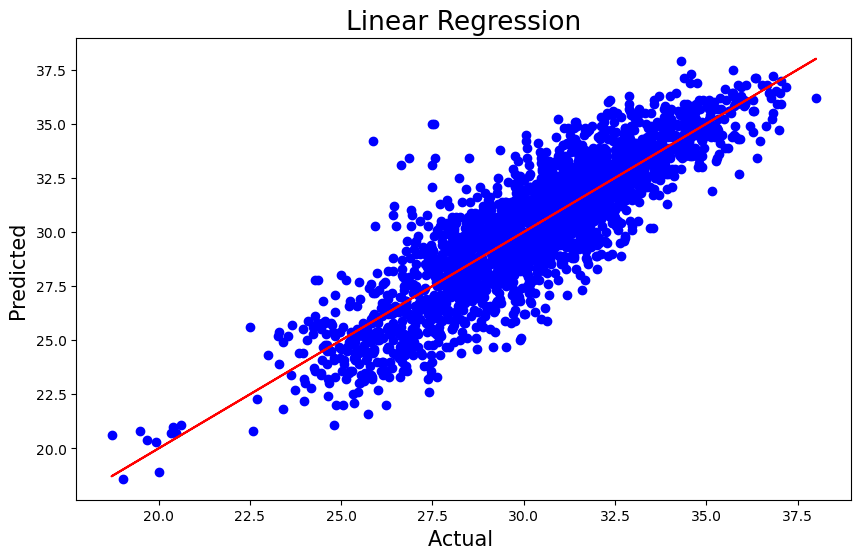

In [139]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_Tmax_test,color='b')
plt.plot(pred_LR,pred_LR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Linear Regression",fontsize=19)
plt.show()

In [140]:
lasso=Lasso()
lasso.fit(x_Tmax_train,y_Tmax_train)
pred_lasso= lasso.predict(x_Tmax_test)
pred_train=lasso.predict(x_Tmax_train)
print('R2_score:',r2_score(y_Tmax_test,pred_lasso)) 
print('R2_score on training Data:',r2_score(y_Tmax_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_Tmax_test, pred_lasso)) 
print('Mean_Squared_Error:',mean_squared_error(y_Tmax_test, pred_lasso))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_Tmax_test, pred_lasso)))

R2_score: 0.6699735484252451
R2_score on training Data: 64.66016303053885
Mean_Absolute_Error: 1.4843132291306715
Mean_Squared_Error: 3.4499278613019047
Root Mean Squared Error: 1.8573981429144115


In [141]:
rd=Ridge()
rd.fit(x_Tmax_train,y_Tmax_train)
pred_rd= rd.predict(x_Tmax_test)
pred_train=rd.predict(x_Tmax_train)
print('R2_score:',r2_score(y_Tmax_test,pred_rd)) 
print('R2_score on training Data:',r2_score(y_Tmax_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_Tmax_test, pred_rd)) 
print('Mean_Squared_Error:',mean_squared_error(y_Tmax_test, pred_rd))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_Tmax_test, pred_rd)))

R2_score: 0.7620712788691124
R2_score on training Data: 73.02414583134879
Mean_Absolute_Error: 1.2291644320918658
Mean_Squared_Error: 2.487185254747531
Root Mean Squared Error: 1.577081245449178


In [142]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_Tmax_train,y_Tmax_train)
pred_DTR= dtr.predict(x_Tmax_test)
pred_train=dtr.predict(x_Tmax_train)
print('R2_score:',r2_score(y_Tmax_test,pred_DTR)) 
print('R2_score on training Data:',r2_score(y_Tmax_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_Tmax_test, pred_DTR)) 
print('Mean_Squared_Error:',mean_squared_error(y_Tmax_test, pred_DTR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_Tmax_test, pred_DTR)))

R2_score: 0.7955855002255671
R2_score on training Data: 100.0
Mean_Absolute_Error: 1.0139940784768775
Mean_Squared_Error: 2.136844712479565
Root Mean Squared Error: 1.4617950309395518


# Cross Validation Score

In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
score = cross_val_score(LR,x_Tmax,y_Tmax)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_Tmax_test,pred_LR) - score.mean())*100)

[0.66042458 0.52749208 0.62619448 0.8360493  0.64784569]
0.6596012237656075
Difference between R2 score and cross validation score is : 10.246541857794366


In [145]:
score = cross_val_score(lasso,x_Tmax,y_Tmax)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_Tmax_test,pred_lasso) - score.mean())*100)

[0.6386957  0.48342248 0.52043007 0.71594984 0.59801235]
0.591302091229203
Difference between R2 score and cross validation score is : 7.867145719604219


In [146]:
score = cross_val_score(rd,x_Tmax,y_Tmax)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_Tmax_test,pred_rd) - score.mean())*100)

[0.66071599 0.52754461 0.62647595 0.8361234  0.64777773]
0.6597275373531526
Difference between R2 score and cross validation score is : 10.234374151595983


In [147]:
score = cross_val_score(dtr,x_Tmax,y_Tmax)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_Tmax_test,pred_DTR) - score.mean())*100)

[0.10899424 0.15414032 0.09835483 0.58148171 0.37606941]
0.2638081021075432
Difference between R2 score and cross validation score is : 53.17773981180238


lasso(lasso) is our best model as the difference between R2 score and cross validation
score is : 7.867145719604219 and this is least out of all

finaly we observe that lasso(lasso) is our best model

# Hyper Parameter Tuning

In [148]:
# lasso(lasso)
from sklearn.model_selection import GridSearchCV

In [149]:
parameters={'copy_X':[True],
            'selection':['cyclic','random'],
            'alpha':[1.0,2.0],
            'random_state':[100,200],                
            'max_iter':[1000,2000]
            }

In [150]:
GCV=GridSearchCV(Lasso(),parameters, cv =5)

In [151]:
GCV.fit(x_Tmax,y_Tmax)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1.0, 2.0], 'copy_X': [True],
                         'max_iter': [1000, 2000], 'random_state': [100, 200],
                         'selection': ['cyclic', 'random']})

In [152]:
GCV.best_params_

{'alpha': 1.0,
 'copy_X': True,
 'max_iter': 1000,
 'random_state': 100,
 'selection': 'random'}

In [153]:
Final_model1= Lasso(alpha = 1.0,copy_X= True,max_iter =1000,random_state=200,selection= 'random')
Final_model1.fit(x_Tmax_train,y_Tmax_train)
pred = Final_model1.predict(x_Tmax_test)
print('R2_score:',r2_score(y_Tmax_test,pred)) 
print('Mean_Absolute_Error:',mean_absolute_error(y_Tmax_test, pred)) 
print('Mean_Squared_Error:',mean_squared_error(y_Tmax_test, pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_Tmax_test, pred)))

R2_score: 0.6699057560319777
Mean_Absolute_Error: 1.4844372342050176
Mean_Squared_Error: 3.450636528335113
Root Mean Squared Error: 1.8575889018658334


# Saving the model

In [154]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model1,"Second_Phase_Evaluation_Projects2_Temperature_Forecast_maximum_temperature_for_the_next_day_using_ML_Prediction_Project_Analysis.pkl")

['Second_Phase_Evaluation_Projects2_Temperature_Forecast_maximum_temperature_for_the_next_day_using_ML_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [155]:
# first we load the saved model and get prediction
model2= joblib.load("Second_Phase_Evaluation_Projects2_Temperature_Forecast_maximum_temperature_for_the_next_day_using_ML_Prediction_Project_Analysis.pkl")

#prediction
prediction2 = model2.predict(x_Tmax_test)
prediction2

array([30.79697091, 31.12662852, 30.82426149, ..., 31.49840794,
       29.95563639, 30.66979913])

# these are the prediction for the number of maximum_temperature_for_the_next_day

In [156]:
a2=np.array(y_Tmax_test)
df2 = pd.DataFrame()
df2["Predicted2"]  = prediction2
df2["Original2"] = a2
df2

,Predicted2,Original2
0,30.796971,28.7
1,31.126629,31.9
2,30.824261,31.8
3,28.591174,31.6
4,28.605358,29.5
...,...,...
2321,32.751687,33.8
2322,30.821381,28.6
2323,31.498408,32.2
2324,29.955636,29.7


our findings
for both problem

lasso(lasso) is our best model as the difference between R2 score and cross validation score is : 9.19150265348867 and this is least out of all

finaly we observe that lasso(lasso) is our best model



for regression model

lasso(lasso) is our best model as the difference between R2 score and cross validation
score is : 7.867145719604219 and this is least out of all

finaly we observe that lasso(lasso) is our best model

21.10  minimum temperature for next day
32.75   miaximum temperature for next day